In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
from matplotlib import pyplot as plt

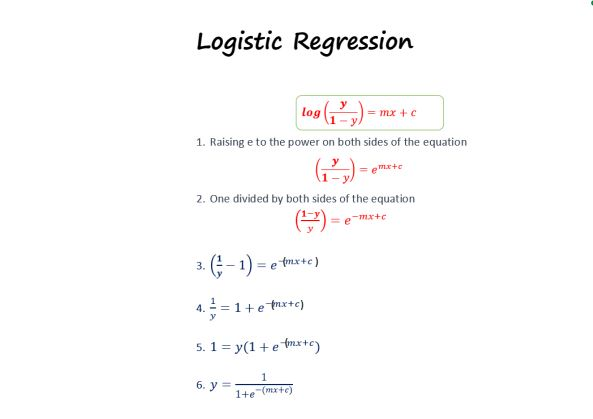

In [2]:
from IPython.display import Image
Image('logit.jpg')

In [3]:
 df = pd.read_csv('shoe.csv')

In [4]:
df.head()

,size(cm),class(y)
0,9.500,Female
1,10.125,Male
2,10.410,Male
3,9.810,Female
4,11.050,Male


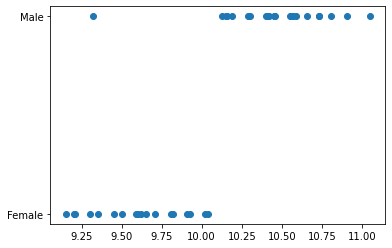

In [5]:
plt.scatter(df['size(cm)'], df['class(y)'])

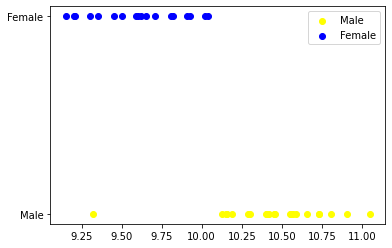

In [6]:
df0 = df[df['class(y)'] == 'Male']
df1 = df[df['class(y)'] == 'Female']

plt.scatter(df0['size(cm)'], df0['class(y)'], color='yellow', label='Male')
plt.scatter(df1['size(cm)'], df1['class(y)'], color='blue', label='Female')

plt.legend()

In [7]:
#preprocessing
df['class(y)'] = df['class(y)'].replace(['Male', 'Female'], [1,0])

In [8]:
df.head()

,size(cm),class(y)
0,9.500,0
1,10.125,1
2,10.410,1
3,9.810,0
4,11.050,1


In [9]:
from sklearn.model_selection import train_test_split

In [10]:
xtrain,xtest,ytrain,ytest = train_test_split(df[['size(cm)']], df['class(y)'], test_size=.30,random_state=1)

In [11]:
xtrain.head()

,size(cm)
30,10.04
36,9.21
33,9.59
28,10.45
4,11.05


In [12]:
ytrain.head()

30    0
36    0
33    0
28    1
4     1
Name: class(y), dtype: int64

In [13]:
from sklearn.linear_model import LogisticRegression

In [14]:
reg=LogisticRegression()

In [15]:
reg.fit(xtrain, ytrain)

LogisticRegression()

In [16]:
reg.coef_

array([[2.47032006]])

In [17]:
reg.intercept_

array([-24.68727138])

In [18]:
reg.predict_proba(xtest)

array([[0.26332448, 0.73667552],
       [0.55141748, 0.44858252],
       [0.61145481, 0.38854519],
       [0.83058498, 0.16941502],
       [0.11744111, 0.88255889],
       [0.13952234, 0.86047766],
       [0.87656832, 0.12343168],
       [0.84075928, 0.15924072],
       [0.18642364, 0.81357636],
       [0.32468537, 0.67531463],
       [0.26814446, 0.73185554],
       [0.53916788, 0.46083212]])

In [19]:
reg.predict(xtest)

array([1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0], dtype=int64)

In [20]:
ytest

2     1
31    0
3     0
21    0
27    1
29    1
22    0
39    1
19    1
26    1
32    1
17    0
Name: class(y), dtype: int64

In [21]:
reg.score(xtest, ytest)

0.9166666666666666

# KNN Classification with Sklearn

In [22]:
from sklearn.neighbors import KNeighborsClassifier

In [23]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(xtrain, ytrain)

KNeighborsClassifier()

In [24]:
pred= knn.predict(xtest)
pred_probs = knn.predict_proba(xtest)[:,1]

In [25]:
np.round(knn.predict_proba(xtest),2)[:4]

array([[0. , 1. ],
       [0.8, 0.2],
       [1. , 0. ],
       [1. , 0. ]])

In [26]:
np.max(pred_probs)

1.0

<function matplotlib.pyplot.show(close=None, block=None)>

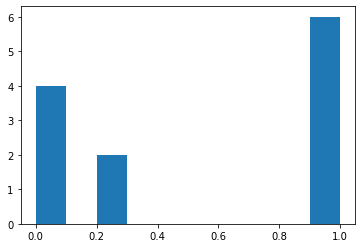

In [27]:
plt.hist(pred_probs)
plt.show

In [28]:
pred_probs_30=np.where(pred_probs>0.3,1,0)
pred_probs_70=np.where(pred_probs>0.7,1,0)

In [29]:
df_prediction=pd.DataFrame({'ytest':ytest,'pred':pred, 
                            ' pred_probs_30':pred_probs_30, 'pred_probs_70':pred_probs_70 })

In [30]:
df_prediction.head()

,ytest,pred,pred_probs_30,pred_probs_70
2,1,1,1,1
31,0,0,0,0
3,0,0,0,0
21,0,0,0,0
27,1,1,1,1


# Preformance metrics:

In [31]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
from sklearn.metrics import confusion_matrix,classification_report, roc_curve,roc_auc_score

In [32]:
print(confusion_matrix(ytest,pred))

[[5 0]
 [1 6]]


In [33]:
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       1.00      0.86      0.92         7

    accuracy                           0.92        12
   macro avg       0.92      0.93      0.92        12
weighted avg       0.93      0.92      0.92        12



# ROC and AUC

No Skill: ROC AUC=0.500
KNN: ROC AUC=0.900


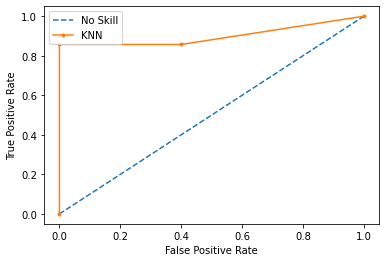

In [34]:
# generate a no skill (ns) prediction and KNN  (lr) predictions.
ns_probs = [0 for i in range(len(ytest))]
lr_probs = knn.predict_proba(xtest)[:,1]

# calculating scores for no skill and KNN
ns_auc = roc_auc_score(ytest, ns_probs)
lr_auc = roc_auc_score(ytest, lr_probs)

print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('KNN: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(ytest, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(ytest, lr_probs)

# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='KNN')

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# show the legend
plt.legend()

# show the plot
plt.show()

# Cross Validation

In [35]:
from sklearn.model_selection import cross_val_score
import sklearn.metrics
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_we

In [36]:
#remember we saved our model in an object called "knn"
accuracy=cross_val_score(estimator=knn,X=xtrain,y=ytrain,cv=5,scoring="accuracy")

In [37]:
1-accuracy

array([0.16666667, 0.        , 0.16666667, 0.        , 0.        ])

In [38]:
error_rate=round((1-accuracy).mean(),4)
error_rate

0.0667

# Choosing K

Lets state with a simple error rate approach in the test set.

In [39]:
error_rate = []
k=28

for i in range(1,k):
    KNN_i = KNeighborsClassifier(n_neighbors=i)
    KNN_i.fit(xtrain, ytrain)
    error_rate.append(np.mean(ytest !=KNN_i.predict(xtest)))

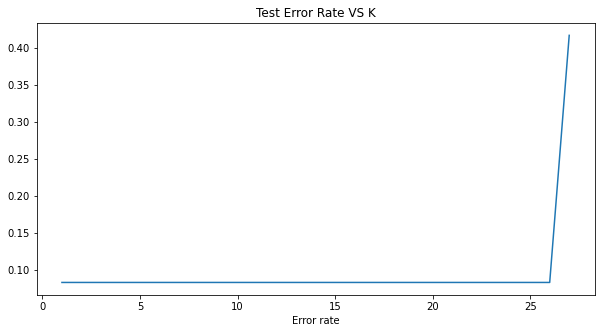

In [40]:
plt.figure(figsize=(10,5))
sns.lineplot(y=error_rate,x=range(1,k))
plt.title('Test Error Rate VS K')
plt.xlabel('Error rate')
plt.show()

In [41]:
error_rate_test=[]
error_rate_CV=[]
k=23
for i in range(1,k):
    KNN_i=KNeighborsClassifier(n_neighbors=i)
    KNN_i.fit(xtrain,ytrain)
    accuracy=cross_val_score(estimator=KNN_i,X=xtrain,y=ytrain,cv=5,scoring="accuracy")
    error_rate_CV.append(np.mean(1-accuracy))
    error_rate_test.append(np.mean(ytest != KNN_i.predict(xtest)) )
optimal_k=pd.DataFrame({'error_rate_CV':error_rate_CV,'error_rate_test':error_rate_test},index=range(1,k))

In [42]:
optimal_k.head()

,error_rate_CV,error_rate_test
1,0.000000,0.083333
2,0.000000,0.083333
3,0.066667,0.083333
4,0.100000,0.083333
5,0.066667,0.083333


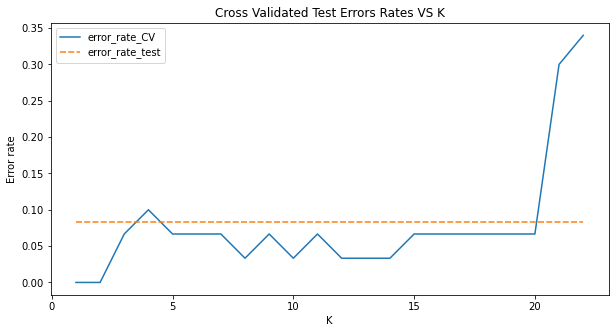

In [43]:
plt.figure(figsize=(10,5))
sns.lineplot(data=optimal_k)
plt.title('Cross Validated Test Errors Rates VS K')
plt.xlabel('K')
plt.ylabel('Error rate')
plt.show()

In [44]:
optimal_k

,error_rate_CV,error_rate_test
1,0.000000,0.083333
2,0.000000,0.083333
3,0.066667,0.083333
4,0.100000,0.083333
5,0.066667,0.083333
6,0.066667,0.083333
7,0.066667,0.083333
8,0.033333,0.083333
9,0.066667,0.083333
10,0.033333,0.083333


In [45]:
accuracy_df=pd.DataFrame({'Algorithm Name':['Logistic Regression','KNN Classifier'],'Accuracy':[0.58,0.83]})
accuracy_df

,Algorithm Name,Accuracy
0,Logistic Regression,0.58
1,KNN Classifier,0.83


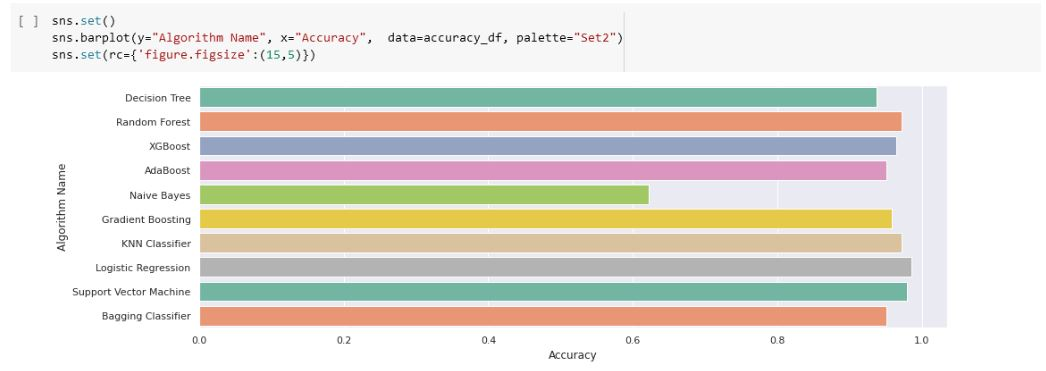

In [46]:
Image('Captur.jpg')

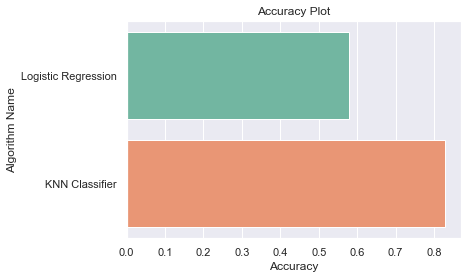

In [47]:
sns.set()
sns.barplot(y="Algorithm Name", x="Accuracy", data=accuracy_df, palette="Set2").set(title='Accuracy Plot')
sns.set(rc={'figure.figsize':(10,5)})